In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rc('legend',fontsize=18)

## Load Data

In [30]:
def add_theories(paths, start=1, stop=100):
    theories = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"theory_{}.csv".format(i))) & (i<=stop):
            theory = pd.read_csv(path+"theory_{}.csv".format(i))
            theories.append(theory)
            i += 1
    return pd.concat(theories)

def add_xi2s(paths, start=1, stop=100):
    theories = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"xi2s_{}.csv".format(i))) & (i<=stop):
            theory = pd.read_csv(path+"xi2s_{}.csv".format(i))
            theories.append(theory)
            i += 1
    return pd.concat(theories)

def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chains.append(chain)
            i += 1
    return pd.concat(chains)

In [31]:
data_wlwl = pd.read_csv("data/DESY1/data_wlwl.csv")
data_gcgc = pd.read_csv("data/DESY1/data_gcgc.csv")
data_3x2 = pd.read_csv("data/DESY1/data_3x2.csv")
idx_wlwl = pd.read_csv("data/DESY1/idx_wlwl.csv")
idx_gcgc = pd.read_csv("data/DESY1/idx_gcgc.csv")
idx_3x2 = pd.read_csv("data/DESY1/idx_3x2.csv")
files_wlwl = np.load("data/DESY1/files_wlwl.npz")
files_gcgc = np.load("data/DESY1/files_gcgc.npz")
files_3x2 = np.load("data/DESY1/files_3x2.npz")

In [32]:
pairs_wlwl =  [
    ["DESwl__0", "DESwl__0"],
    ["DESwl__0", "DESwl__1"],
    ["DESwl__0", "DESwl__2"],
    ["DESwl__0", "DESwl__3"],
    ["DESwl__1", "DESwl__1"],
    ["DESwl__1", "DESwl__2"],
    ["DESwl__1", "DESwl__3"],
    ["DESwl__2", "DESwl__2"],
    ["DESwl__2", "DESwl__3"],
    ["DESwl__3", "DESwl__3"]]
pairs_gcgc = [
    ["DESgc__0", "DESgc__0"],
    ["DESgc__1", "DESgc__1"],
    ["DESgc__2", "DESgc__2"],
    ["DESgc__3", "DESgc__3"],
    ["DESgc__4", "DESgc__4"]]
pairs_3x2 = [
    ["DESgc__0", "DESgc__0"],
    ["DESgc__1", "DESgc__1"], 
    ["DESgc__2", "DESgc__2"], 
    ["DESgc__3", "DESgc__3"], 
    ["DESgc__4", "DESgc__4"], 
    ["DESgc__0", "DESwl__0"], 
    ["DESgc__0", "DESwl__1"], 
    ["DESgc__0", "DESwl__2"], 
    ["DESgc__0", "DESwl__3"], 
    ["DESgc__1", "DESwl__0"], 
    ["DESgc__1", "DESwl__1"], 
    ["DESgc__1", "DESwl__2"], 
    ["DESgc__1", "DESwl__3"], 
    ["DESgc__2", "DESwl__0"], 
    ["DESgc__2", "DESwl__1"], 
    ["DESgc__2", "DESwl__2"], 
    ["DESgc__2", "DESwl__3"], 
    ["DESgc__3", "DESwl__0"], 
    ["DESgc__3", "DESwl__1"], 
    ["DESgc__3", "DESwl__2"], 
    ["DESgc__3", "DESwl__3"], 
    ["DESgc__4", "DESwl__0"], 
    ["DESgc__4", "DESwl__1"], 
    ["DESgc__4", "DESwl__2"],
    ["DESgc__4", "DESwl__3"], 
    ["DESwl__0", "DESwl__0"], 
    ["DESwl__0", "DESwl__1"], 
    ["DESwl__0", "DESwl__2"], 
    ["DESwl__0", "DESwl__3"], 
    ["DESwl__1", "DESwl__1"], 
    ["DESwl__1", "DESwl__2"], 
    ["DESwl__1", "DESwl__3"], 
    ["DESwl__2", "DESwl__2"], 
    ["DESwl__2", "DESwl__3"], 
    ["DESwl__3", "DESwl__3"]]


In [33]:
path_dzs_wlwl_nomarg = "chains/nomarg/DES_wlwl_nomarg_TAP_0.65_init_ϵ_0.03/"
path_dzs_gcgc_nomarg = "chains/nomarg/DES_gcgc_nomarg_TAP_0.65_init_ϵ_0.03/"
path_dzs_3x2_nomarg = "chains/nomarg/DES_3x2_nomarg_TAP_0.65_init_ϵ_0.03/"

In [34]:
theories_dzs_wlwl_nomarg = add_theories([path_dzs_wlwl_nomarg])
theories_dzs_gcgc_nomarg = add_theories([path_dzs_gcgc_nomarg])
theories_dzs_3x2_nomarg =  add_theories([path_dzs_3x2_nomarg])

In [35]:
def make_cls_m_s(ts):
    tss = [np.array(np.matrix(t)).ravel() for t in ts["Theories"]]
    return np.mean(tss, 0), np.std(tss, 0)

['DESgc__0', 'DESgc__0']
['DESgc__1', 'DESgc__1']
['DESgc__2', 'DESgc__2']
['DESgc__3', 'DESgc__3']
['DESgc__4', 'DESgc__4']


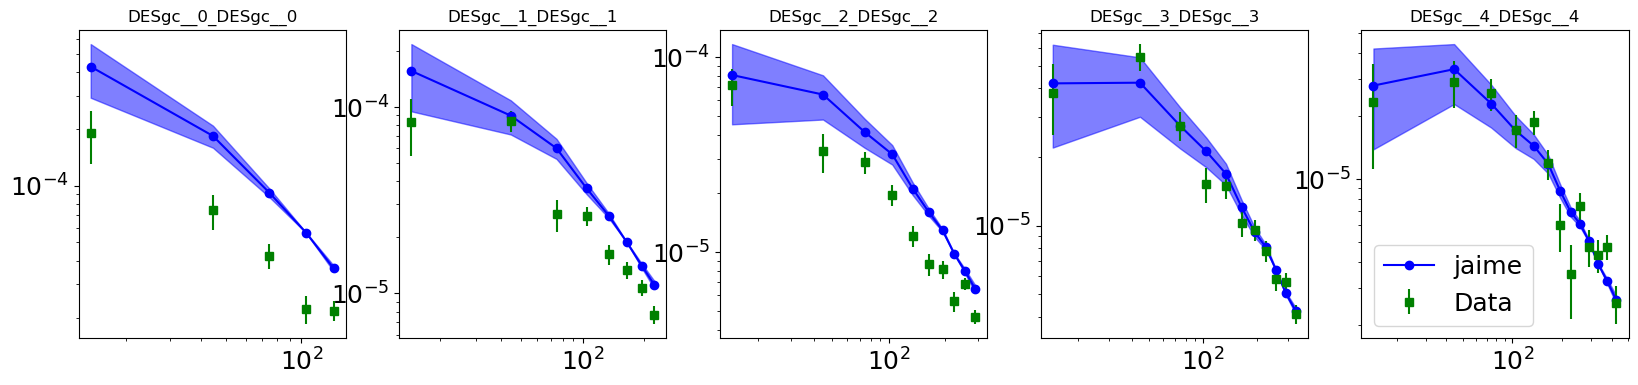

5


In [44]:
figure, axis = plt.subplots(1, 5, figsize=(20, 4))
l = 0
pairs = pairs_gcgc
files = files_gcgc
data = data_gcgc["data"]
err = data_gcgc["err"]
idx = idx_gcgc["idx"]
cls_m, cls_s = make_cls_m_s(theories_dzs_gcgc_nomarg)
for i in range(0,5):
        pair = pairs[l]
        t1, t2 = pair[0], pair[1]
        axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                        data[idx[l]:idx[l+1]], 
                        yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                        cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
        axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
        axis[i].set_title("{}_{}".format(t1,t2))
        axis[i].set_xscale("log")
        axis[i].set_yscale("log")
        l += 1
plt.legend()
plt.show()
print(l)

['DESwl__0', 'DESwl__0']
['DESwl__0', 'DESwl__1']
['DESwl__0', 'DESwl__2']
['DESwl__0', 'DESwl__3']
['DESwl__1', 'DESwl__1']
['DESwl__1', 'DESwl__2']
['DESwl__1', 'DESwl__3']
['DESwl__2', 'DESwl__2']
['DESwl__2', 'DESwl__3']
['DESwl__3', 'DESwl__3']


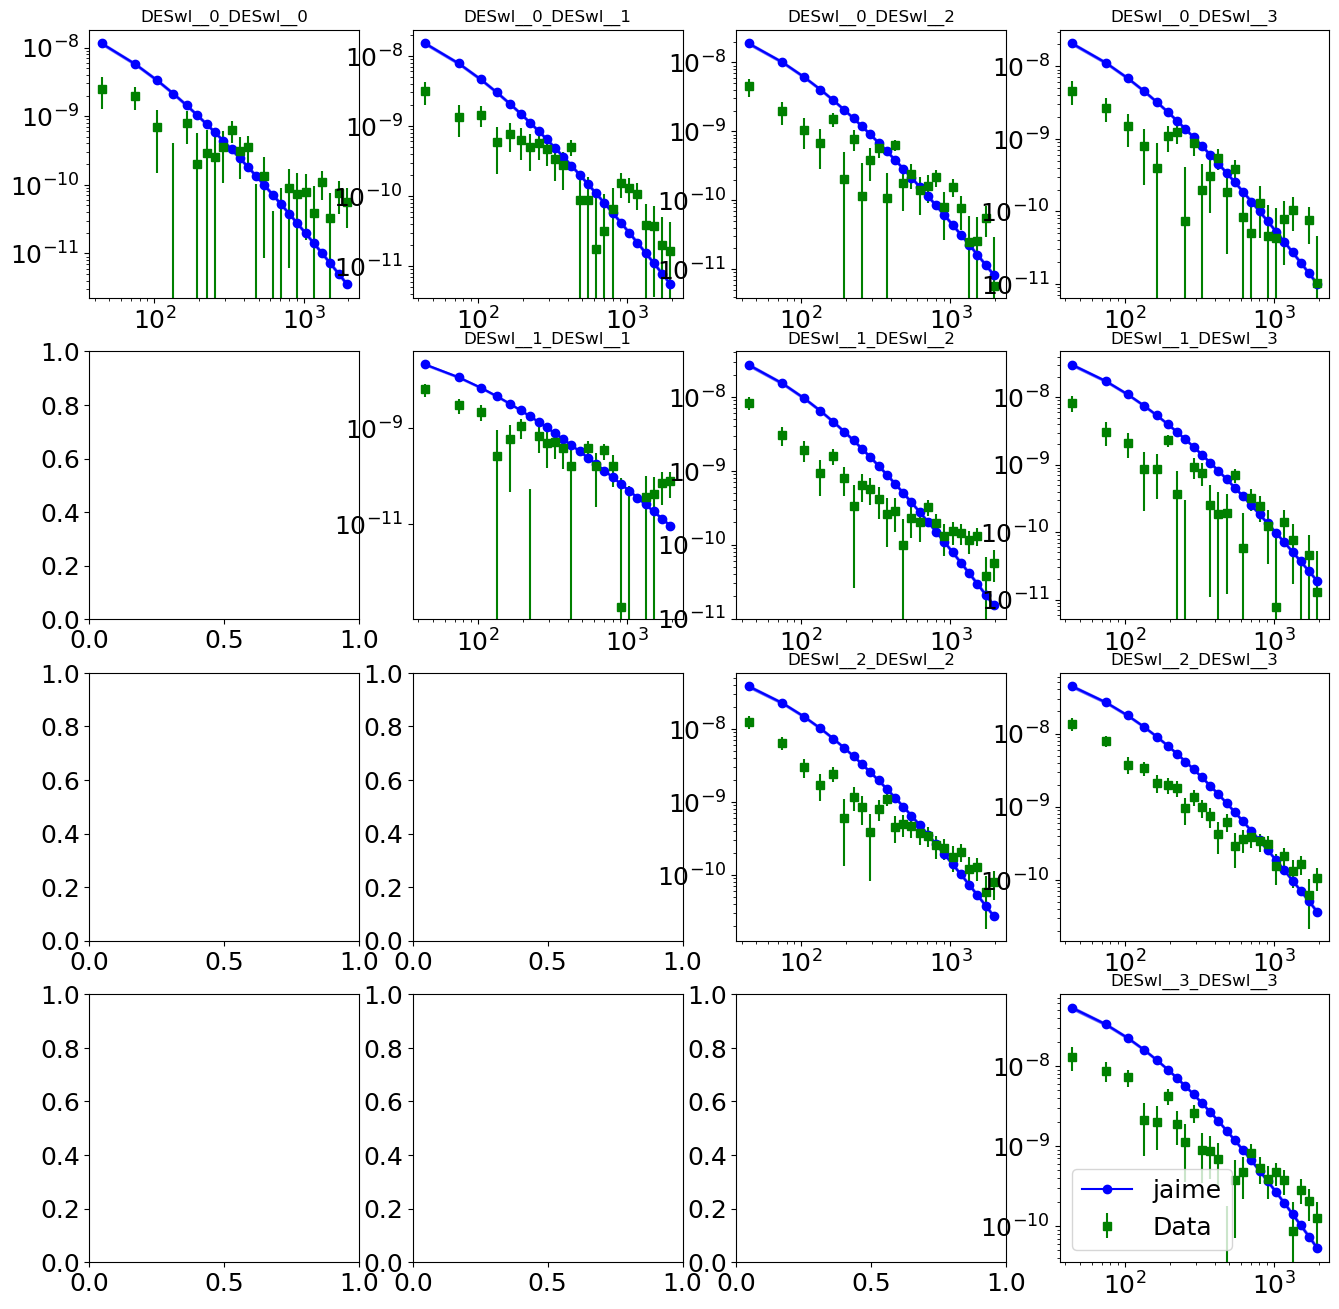

10


In [45]:
figure, axis = plt.subplots(4, 4, figsize=(16,16))
l = 0
pairs = pairs_wlwl
files = files_wlwl
data = data_wlwl["data"]
err = data_wlwl["err"]
idx = idx_wlwl["idx"]
cls_m, cls_s = make_cls_m_s(theories_dzs_wlwl_nomarg)
for i in range(0,4):
    for j in range(0,4):
        if j >= i:
            pair = pairs[l]
            print(pair)
            t1, t2 = pair[0], pair[1]
            axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                         data[idx[l]:idx[l+1]], 
                         yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
            axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                            (cls_m+cls_s)[idx[l]:idx[l+1]],
                            (cls_m-cls_s)[idx[l]:idx[l+1]],
                            color="b", alpha=.5)
            #axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
            #                cls_carlos[idx[l]:idx[l+1]],
            #                "ro-", label="carlos")
            axis[i, j].set_title("{}_{}".format(t1,t2))
            axis[i, j].set_xscale("log")
            axis[i, j].set_yscale("log")
            l += 1
plt.legend()
plt.show()
print(l)

['DESgc__0', 'DESgc__0']
['DESgc__1', 'DESgc__1']
['DESgc__2', 'DESgc__2']
['DESgc__3', 'DESgc__3']
['DESgc__4', 'DESgc__4']


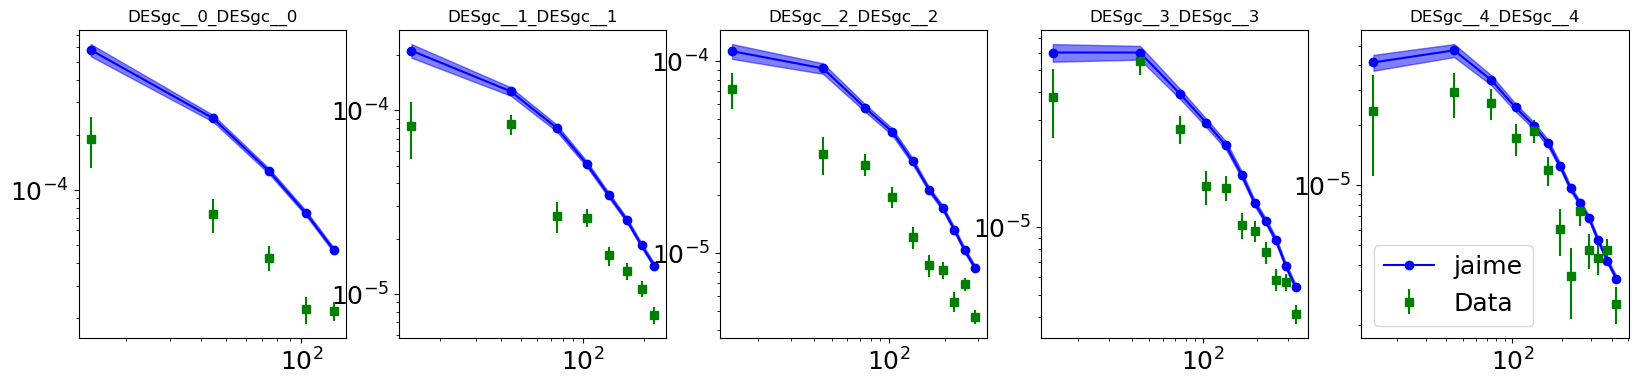

5


In [48]:
figure, axis = plt.subplots(1, 5, figsize=(20, 4))
l = 0
pairs = pairs_3x2
files = files_3x2
data = data_3x2["data"]
err = data_3x2["err"]
idx = idx_3x2["idx"]
cls_m, cls_s = make_cls_m_s(theories_dzs_3x2_nomarg)
for i in range(0,5):
        pair = pairs[l]
        print(pair)
        t1, t2 = pair[0], pair[1]
        axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                        data[idx[l]:idx[l+1]], 
                        yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                        cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
        axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
        axis[i].set_title("{}_{}".format(t1,t2))
        axis[i].set_yscale("log")
        axis[i].set_xscale("log")
        l += 1
plt.legend()
plt.show()
print(l)

['DESgc__0', 'DESwl__0']
['DESgc__0', 'DESwl__1']
['DESgc__0', 'DESwl__2']
['DESgc__0', 'DESwl__3']
['DESgc__1', 'DESwl__0']
['DESgc__1', 'DESwl__1']
['DESgc__1', 'DESwl__2']
['DESgc__1', 'DESwl__3']
['DESgc__2', 'DESwl__0']
['DESgc__2', 'DESwl__1']
['DESgc__2', 'DESwl__2']
['DESgc__2', 'DESwl__3']
['DESgc__3', 'DESwl__0']
['DESgc__3', 'DESwl__1']
['DESgc__3', 'DESwl__2']
['DESgc__3', 'DESwl__3']
['DESgc__4', 'DESwl__0']
['DESgc__4', 'DESwl__1']
['DESgc__4', 'DESwl__2']
['DESgc__4', 'DESwl__3']


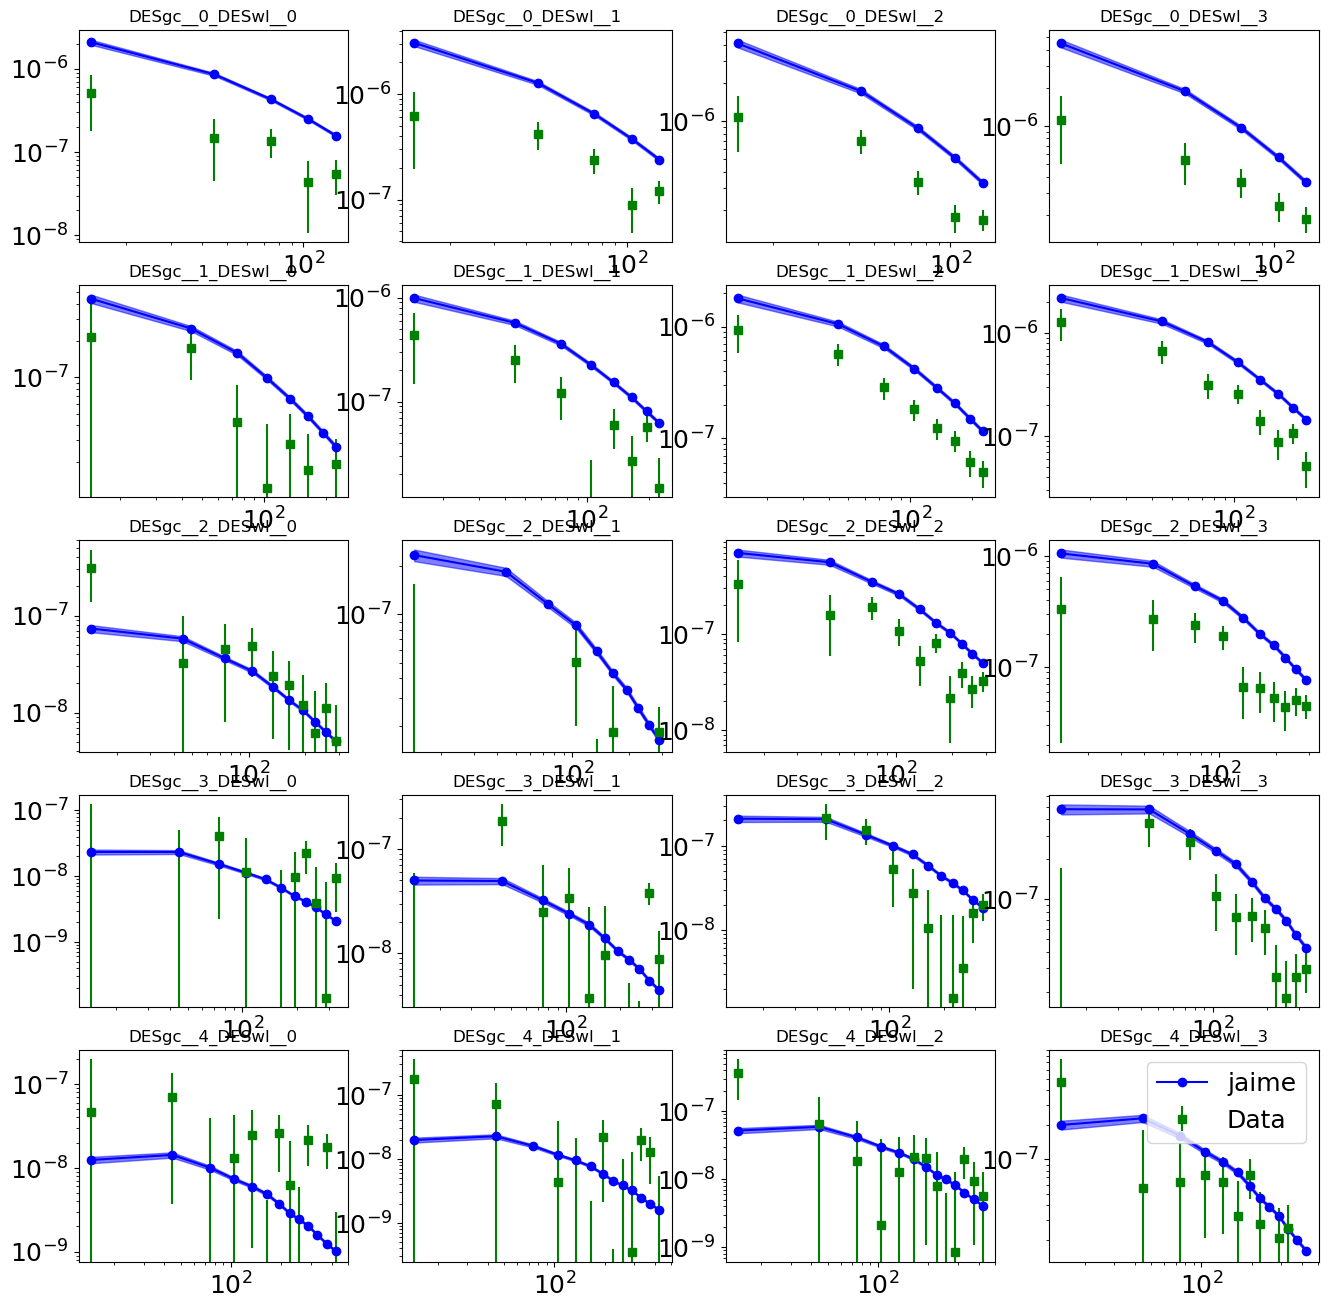

25


In [49]:
figure, axis = plt.subplots(5, 4, figsize=(16,16))
pairs = pairs_3x2
files = files_3x2
data = data_3x2["data"]
err = data_3x2["err"]
idx = idx_3x2["idx"]
cls_m, cls_s = make_cls_m_s(theories_dzs_3x2_nomarg)
l = 5
for i in range(0,5):
    for j in range(0,4):
        pair = pairs[l]
        print(pair)
        t1, t2 = pair[0], pair[1]
        axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                     cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
        axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
        axis[i, j].set_title("{}_{}".format(t1,t2))
        axis[i, j].set_xscale("log")
        axis[i, j].set_yscale("log")
        l += 1
plt.legend()
plt.show()
print(l)

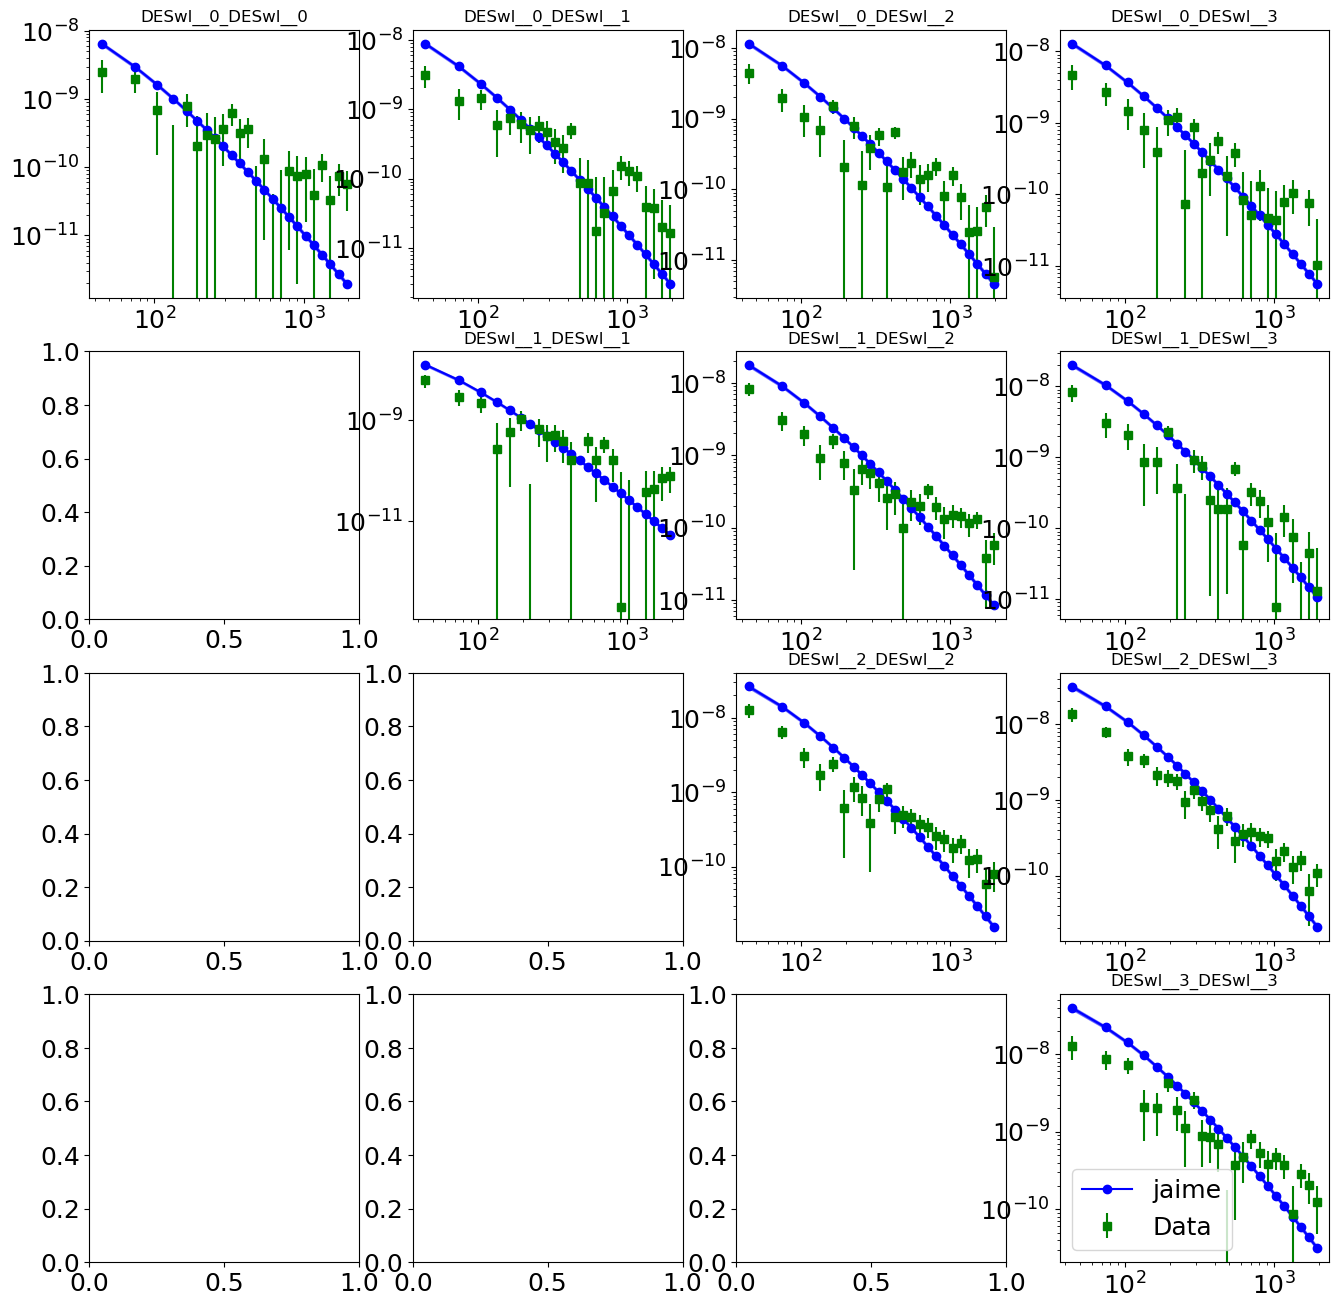

35


In [50]:
figure, axis = plt.subplots(4, 4, figsize=(16,16))
l = 25
pairs = pairs_3x2
files = files_3x2
data = data_3x2["data"]
err = data_3x2["err"]
idx = idx_3x2["idx"]
cls_m, cls_s = make_cls_m_s(theories_dzs_3x2_nomarg)
for i in range(0,4):
    for j in range(0,4):
        if j >= i:
            pair = pairs[l]
            t1, t2 = pair[0], pair[1]
            axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                         data[idx[l]:idx[l+1]], 
                         yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
            axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                            (cls_m+cls_s)[idx[l]:idx[l+1]],
                            (cls_m-cls_s)[idx[l]:idx[l+1]],
                            color="b", alpha=.5)
            axis[i, j].set_title("{}_{}".format(t1,t2))
            axis[i, j].set_xscale("log")
            axis[i, j].set_yscale("log")
            l += 1
plt.legend()
plt.show()
print(l)

## Load Chains

In [51]:
def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chains.append(chain)
            i += 1
    return pd.concat(chains)

In [52]:
#dzs_wlwl_num = add_chains(["../chains/Nzs_chains/lite_runs/dz_numerical_custom_nz_lite_TAP_0.65/"])
#dzs_gcgc_num = add_chains(["../chains/Nzs_chains/lite_runs/dz_numerical_custom_nz_lite_TAP_0.65/"])
#dzs_3x2_num = add_chains(["../chains/Nzs_chains/lite_runs/dz_numerical_custom_nz_lite_TAP_0.65/"])

#dzs_wlwl_ana = add_chains(["../chains/Nzs_chains/lite_runs/dz_analytical_custom_nz_lite_TAP_0.65/"])
#dzs_gcgc_ana = add_chains(["../chains/Nzs_chains/lite_runs/dz_analytical_custom_nz_lite_TAP_0.65/"])
#dzs_3x2_ana = add_chains(["../chains/Nzs_chains/lite_runs/dz_analytical_custom_nz_lite_TAP_0.65/"])

dzs_wlwl_nomarg = add_chains([path_dzs_wlwl_nomarg])
dzs_gcgc_nomarg = add_chains([path_dzs_gcgc_nomarg])
dzs_3x2_nomarg = add_chains([path_dzs_3x2_nomarg])

## Plot Data

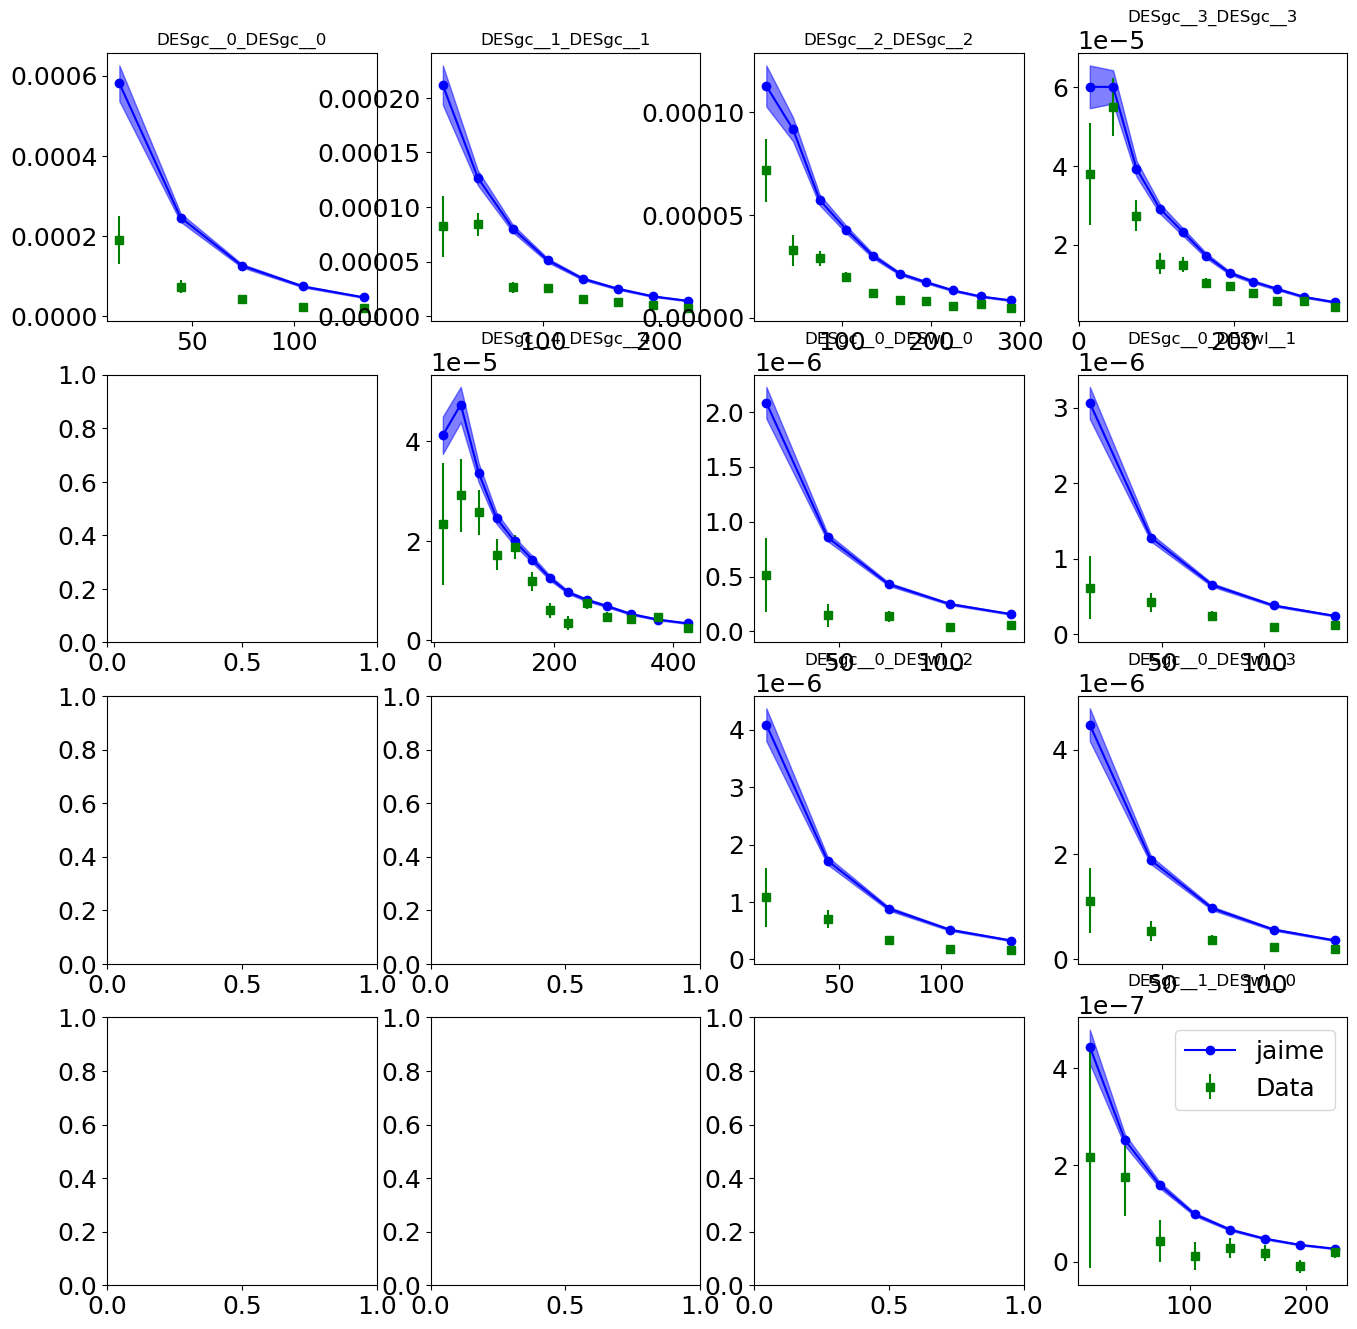

10


In [53]:
figure, axis = plt.subplots(4, 4, figsize=(16,16))
l = 0
for i in range(0,4):
    for j in range(0,4):
        if j >= i:
            t1, t2 = pairs[l][0], pairs[l][1]
            axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                         data[idx[l]:idx[l+1]], 
                         yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
            axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                            (cls_m+cls_s)[idx[l]:idx[l+1]],
                            (cls_m-cls_s)[idx[l]:idx[l+1]],
                            color="b", alpha=.5)
            #axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
            #                cls_carlos[idx[l]:idx[l+1]],
            #                "ro-", label="carlos")
            axis[i, j].set_title("{}_{}".format(t1,t2))
            l += 1
plt.legend()
plt.show()
print(l)

## Make GetDist

In [54]:
labels_dict = {'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               'ns': 'n_s',
               'σ8': '\sigma_8',
               'S8': 'S_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',
               
               'DESgc__0_dz': 'dz_{DESY1gc \, 0}',
               'DESgc__1_dz': 'dz_{DESY1gc \, 1}',
               'DESgc__2_dz': 'dz_{DESY1gc \, 2}',
               'DESgc__3_dz': 'dz_{DESY1gc \, 3}',
               'DESgc__4_dz': 'dz_{DESY1gc \, 4}',
               
               'DESwl__0_dz': 'dz_{DESY1wl \, 0}',
               'DESwl__1_dz': 'dz_{DESY1wl \, 1}',
               'DESwl__2_dz': 'dz_{DESY1wl \, 2}',
               'DESwl__3_dz': 'dz_{DESY1wl \, 3}',
               
               'DESgc__0_b': 'b_{DESY1 \, 0}',
               'DESgc__1_b': 'b_{DESY1 \, 1}',
               'DESgc__2_b': 'b_{DESY1 \, 2}',
               'DESgc__3_b': 'b_{DESY1 \, 3}',
               'DESgc__4_b': 'b_{DESY1 \, 4}',
               
               'DESwl__0_m': 'm_{DESY1 \, 0 }',
               'DESwl__1_m': 'm_{DESY1 \, 1 }',
               'DESwl__2_m': 'm_{DESY1 \, 2 }', 
               'DESwl__3_m': 'm_{DESY1 \, 3 }',
               
               'DESwl__0_b': 'b_{DESY1 \, 0 }',
               'DESwl__1_b': 'b_{DESY1 \, 1 }',
               'DESwl__2_b': 'b_{DESY1 \, 2 }', 
               'DESwl__3_b': 'b_{DESY1 \, 3 }'}

In [55]:
def make_chain(file, label, ranges=dict({}), weight=False, labels_dict=labels_dict):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        #print(param)
        if param in labels_dict.keys():
            #print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])
    if ('σ8' in params) & ('Ωm' in params):
        #print('S8')
        names.append('S8')
        labels.append(labels_dict['S8'])
        samples.append(file['σ8']*np.sqrt(file['Ωm']/0.3))

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    if weight == True:
        if "log_density" in params:
            print("applying weights")
            ws = np.array(file['log_density'])
    else:
        ws = None
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges, weights=ws,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [56]:
dzs_wlwl_nomarg_samples = make_chain(dzs_wlwl_nomarg, "WLWL dzs nomarg")
dzs_gcgc_nomarg_samples = make_chain(dzs_gcgc_nomarg, "GCGC dzs nomarg")
dzs_3x2_nomarg_samples  = make_chain(dzs_3x2_nomarg,  "3x2 dzs nomarg")

WLWL dzs nomarg
Removed no burn in
GCGC dzs nomarg
Removed no burn in
3x2 dzs nomarg
Removed no burn in


In [57]:
LSST_markers = {'h': 0.6736,
               'Ωm': 0.313,
               'Ωb': 0.049,
               'ns': 0.9649,
               's8': 0.82,
               'S8': 0.82 * np.sqrt(0.313/0.3)}

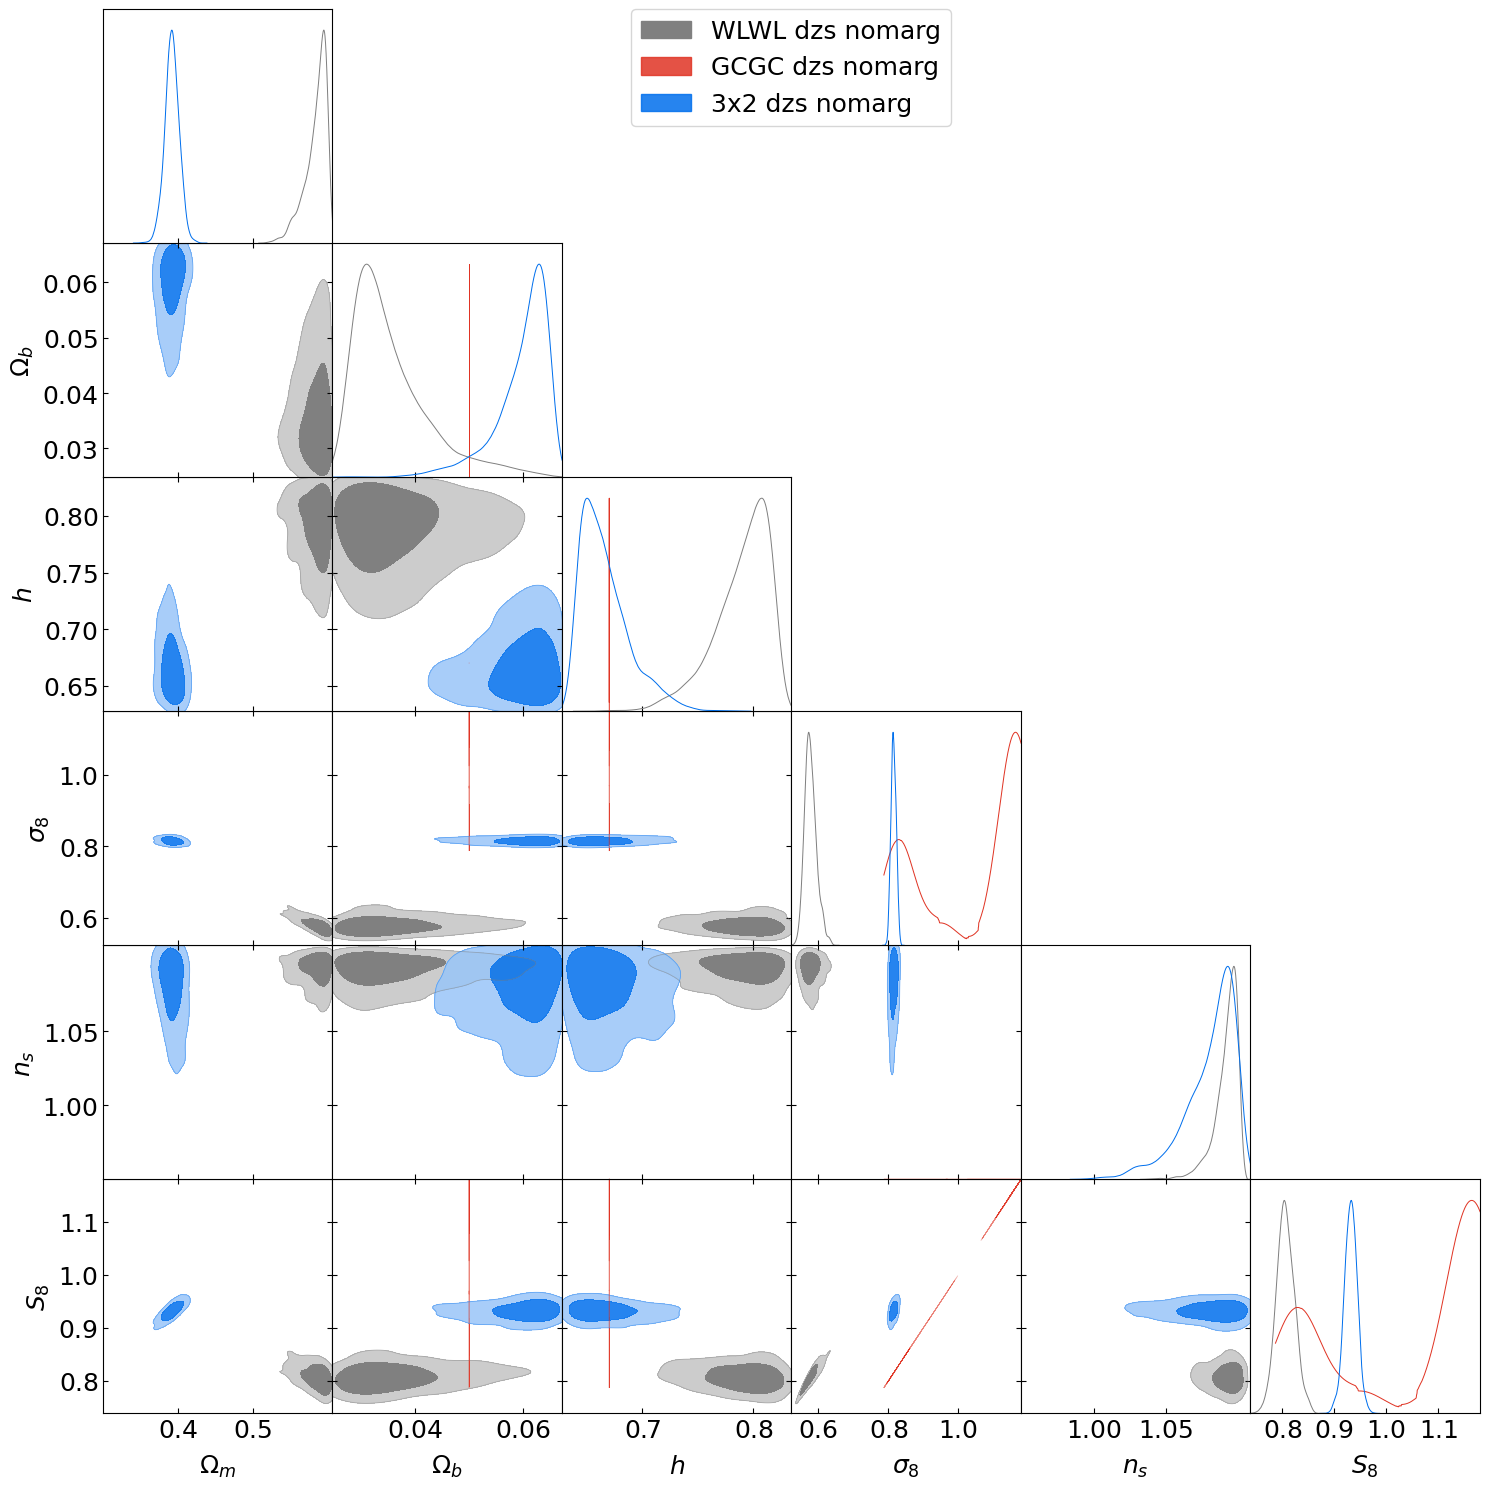

In [58]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([dzs_wlwl_nomarg_samples,
                 dzs_gcgc_nomarg_samples,
                 dzs_3x2_nomarg_samples], filled=[True, True, True])